<a href="https://colab.research.google.com/github/alehfernandez/Data-Science-III-NLP-Deep-Learning/blob/main/Proyecto_DS_III_Entrega_Final_Fernandez_Alejandro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **a) Presentación del proyecto**

**Abstracto con Motivación y Audiencia**

El análisis de reseñas de películas es importante en el contexto actual del entretenimiento, plataformas como Netflix compiten por la atención de los usuarios debido a la variada oferta de la competencia. Este proyecto se centra en el análisis de sentimiento de las reseñas para comprender las preferencias del público y  los factores que influyen en la popularidad de las películas. Este análisis está dirigido a areas de marketing y entretenimiento de empresas relacionadas al streaming.

**Contexto Comercial y Analítico**

Comercial: Por medio del analisis de sentimiento las empresas de streaming podrian entender las preferencias de los usuarios, tener recomendaciones más eficientes

Analítico: utilizaremos técnicas de NLP como la tokenización y el análisis de frecuencia de palabras, junto con modelos de Deep Learning para la clasificación de sentimiento.

**Preguntas/Hipótesis a Resolver**

1. ¿Qué palabras se relacionan directamente con reseñas positivas o negativas?
2. ¿Es posible predecir la valoración de una película basándose en el texto de la reseña?"

**Objetivo**

Desarrollar un modelo de Deep Learning capaz de clasificar reseñas de películas como positivas o negativas con precisión. Automatizar el análisis de sentimiento y obtener información relevante sobre los gustos de los usuarios.

# **b) Lectura de datos**

**Librerias necesarias**

In [7]:
import pandas as pd
import nltk
import spacy

#recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Carga el modelo en español de spaCy (solo la primera vez)
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 44.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Configuración del entorno de Python en Google Colab, Lectura y Analisis Inicial**

In [8]:
url = 'https://raw.githubusercontent.com/alehfernandez/Data-Science-III-NLP-Deep-Learning/main/Cr%C3%ADticas%20Filmaffinity%20Netflix%20Espa%C3%B1ol%20(+10000).csv'

df = pd.read_csv(url, delimiter='|')

print(df.head())
print(df.info())
print(df['review_rate'].value_counts())

               film_name                        gender film_avg_rate  \
0  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
1  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
2  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
3  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
4  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   

   review_rate                         review_title  \
0            1                              Respira   
1            2  Esta serie te llama tonto a la cara   
2            1                              Respira   
3            1             Imposible, no hay manera   
4            1                        Serie nefasta   

                                         review_text  
0  Como fan de las series españolas y de Najwa, e...  
1  Todo lo malo que puede tener una serie lo pose...  
2  La serie es un drama médico que intenta "copia...  
3  Nadie te obli

# **c) Análisis Exploratorio**

Longitud promedio de las oraciones: 243.70 palabras


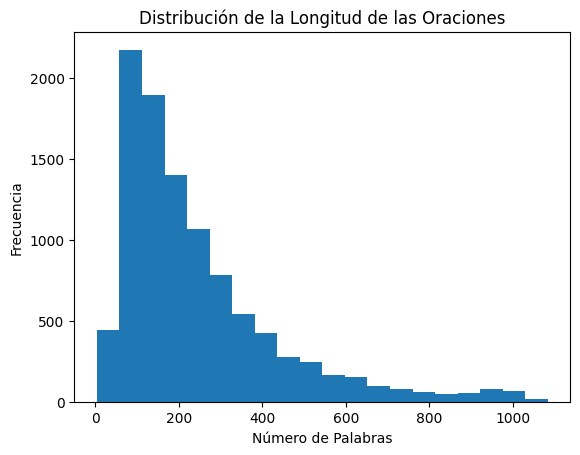

In [9]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy and assign it the alias 'np'

def analizar_longitud_oraciones(df):
    df['review_text'] = df['review_text'].fillna('')
    longitudes_oraciones = df['review_text'].str.split().apply(len)

    # Estadísticas descriptivas
    longitud_promedio = np.mean(longitudes_oraciones)
    print(f'Longitud promedio de las oraciones: {longitud_promedio:.2f} palabras')

    # Histograma
    plt.hist(longitudes_oraciones, bins=20)
    plt.title('Distribución de la Longitud de las Oraciones')
    plt.xlabel('Número de Palabras')
    plt.ylabel('Frecuencia')
    plt.show()

analizar_longitud_oraciones(df)

**Análisis de la Frecuencia de Palabras**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más frecuentes:
película: 10557
serie: 10471
historia: 6787
bien: 6507
si: 6443
personajes: 5575
ser: 5569
ver: 4607
hace: 4126
tan: 3903
mejor: 3365
aunque: 3146
puede: 3006
gran: 2969
menos: 2948
vez: 2913
dos: 2913
parece: 2880
parte: 2835
bastante: 2706


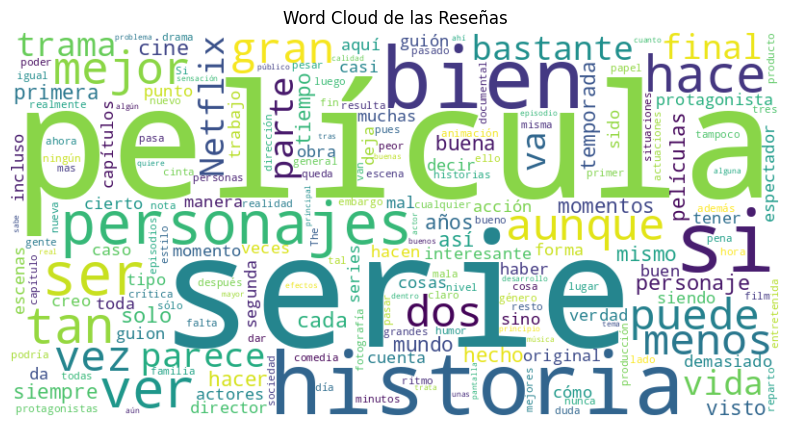

In [10]:
!pip install nltk
import nltk
nltk.download('punkt_tab') # Download the 'punkt_tab' data
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

def analizar_frecuencia_palabras(df):
    # Combinar todas las reseñas en un solo texto
    texto_completo = ' '.join(df['review_text'].astype(str).tolist())

    # Tokenizar el texto
    tokens = word_tokenize(texto_completo)

    # Eliminar stop words (palabras comunes como "el", "la", etc.)
    stop_words = set(stopwords.words('spanish'))
    tokens_filtrados = [w for w in tokens if not w.lower() in stop_words and w.isalnum()]

    # Calcular la frecuencia de palabras
    frecuencia_palabras = nltk.FreqDist(tokens_filtrados)

    # Mostrar las palabras más frecuentes
    print("Palabras más frecuentes:")
    for palabra, frecuencia in frecuencia_palabras.most_common(20):
        print(f'{palabra}: {frecuencia}')

    # Generar un word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud de las Reseñas")
    plt.show()

analizar_frecuencia_palabras(df)

In [11]:
# Distribución de géneros
print("Distribución de géneros:")
print(df['gender'].value_counts())

# Distribución de calificaciones individuales (review_rate)
print("\nDistribución de calificaciones (review_rate):")
print(df['review_rate'].value_counts())

# Distribución de calificaciones promedio de películas (film_avg_rate)
print("\nEstadísticas descriptivas de calificaciones promedio (film_avg_rate):")
print(df['film_avg_rate'].describe())

Distribución de géneros:
gender
Serie de TV, Thriller, Intriga, Acción, Robos & Atracos, Secuestros / Desapariciones                                   339
Comedia, Drama, Ciencia ficción, Sátira, Catástrofes, Fin del mundo, Cambio climático                                  320
Drama, Aventuras, Basado en hechos reales, Supervivencia, Naturaleza, Años 70, Zonas frías/polares, Escenario único    271
Thriller, Drama, Vida rural                                                                                            246
Western, Drama, Drama psicológico, Homosexualidad, Años 20                                                             196
                                                                                                                      ... 
Serie de TV, Thriller, Drama, Alcoholismo                                                                                1
Serie de TV, Comedia, Discapacidad, Discapacidad visual, Biográfico, Amistad                               

Palabras más comunes:
de: 129326
que: 100612
la: 79592
y: 70182
en: 54345
a: 47073
el: 45976
un: 34381
es: 33191
una: 32637


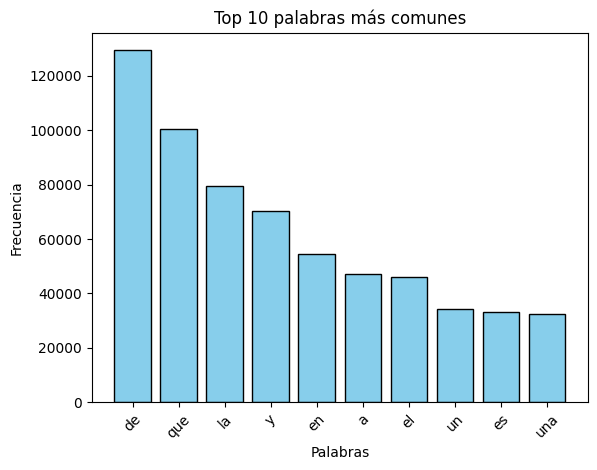

In [12]:
from collections import Counter  # Import the Counter class from collections

# Combinar todas las reseñas en un único string
all_words = ' '.join(df['review_text'].dropna())

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words.split())

# Mostrar las 10 palabras más comunes
print("Palabras más comunes:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Visualización de las palabras más comunes
import matplotlib.pyplot as plt

# Preparar datos para el gráfico
words, counts = zip(*word_counts.most_common(10))

# Crear el gráfico de barras
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Top 10 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Importar la librería necesaria para la tokenización
# import nltk
# from nltk.tokenize import word_tokenize

# Descargar los recursos necesarios de NLTK, incluyendo punkt
# nltk.download('punkt')
# nltk.download('punkt_tab')

# Aplicar tokenización explícita a las reseñas limpias
df['tokenized_review_text'] = df['review_text'].apply(lambda x: word_tokenize(x))

# Ejemplo de texto antes y después de la tokenización
print("Texto original:", df['review_text'].iloc[0])
print("")
print("Texto tokenizado:", df['tokenized_review_text'].iloc[0])


Texto original: Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.

Texto tokenizado: ['Como', 'fan', 'de', 'las', 'series', 'españolas', 'y', 'de', 'Najwa', ',', 'esto', 'duele', ',', 'la', 'serie', 'es', 'muy', 'mala.Manu', 'Ríos', 'da', 'para', 'lo', 'que', 'da', ',', 'enseñar', 'cacho', ',', 'Najwa', 'hace', 'de', 'mala', ',', 'papel', 'repetido', 'que', 'no', 'aporta', 'ninguna', 'capa', 'nueva.Telenovela', 'de', 'mediodía', 'con', 'un', 'guión', 'mediocre', 'y', 'diálogos', 'planos.En', 'aspectos', 'técnicos', 'como', 'fotografía', ',', 'sonido', ',', 'también', 'deja', 'que', 'desear.Lo', 'peor', 'de', 'Carlos', 'Montero', ',', 'de', 'largo', '.']


In [14]:
# Importar librerías necesarias
import re  # Add this line to import the 're' module
import spacy

# Cargar modelo en español para obtener las stopwords
nlp = spacy.load('es_core_news_sm')
stopwords = nlp.Defaults.stop_words

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+', '', text)
    # Eliminar puntuación y caracteres especiales
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    # Eliminar stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]
    # Reconstruir el texto limpio
    return ' '.join(words)

# Aplicar la limpieza al texto de las reseñas
df['cleaned_review_text'] = df['review_text'].apply(lambda x: clean_text(str(x)))

# Mostrar ejemplo de reseña antes y después de limpiar
print("Ejemplo de texto antes y después de la limpieza:")
print("")
print("Original:", df['review_text'].iloc[0])
print("")
print("Limpio:", df['cleaned_review_text'].iloc[0])

Ejemplo de texto antes y después de la limpieza:

Original: Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.

Limpio: fan series españolas najwa duele serie malamanu ríos enseñar cacho najwa mala papel repetido aporta capa nuevatelenovela mediodía guión mediocre diálogos planosen aspectos técnicos fotografía sonido deja desearlo carlos montero


Palabras más comunes:
película: 10694
serie: 10563
historia: 6842
personajes: 5643
netflix: 2762
vida: 2713
trama: 2606
personaje: 2602
cine: 2509
temporada: 2258


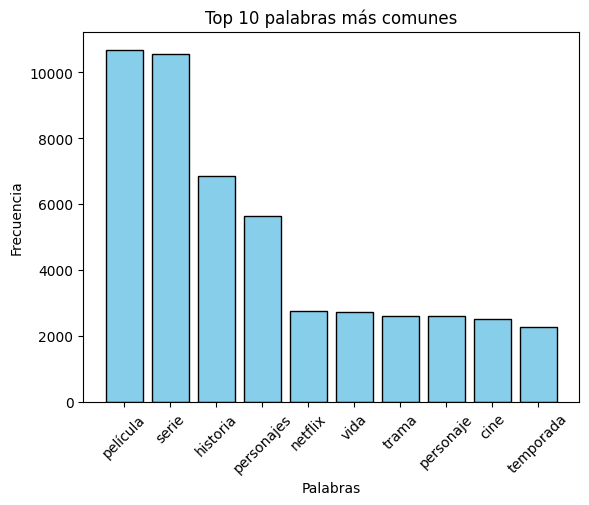

In [15]:
# Importaciones necesarias
#from collections import Counter

# Combinar todas las reseñas en un único string
all_words = ' '.join(df['cleaned_review_text'].dropna())

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words.split())

# Mostrar las 10 palabras más comunes
print("Palabras más comunes:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Visualización de las palabras más comunes
import matplotlib.pyplot as plt

# Preparar datos para el gráfico
words, counts = zip(*word_counts.most_common(10))

# Crear el gráfico de barras
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Top 10 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

**Conclusiones del Analisis exploratorio**

Con el análisis exploratorio se pueden ver las tendencias en la distribución de géneros, calificaciones y palabras clave en las reseñas. La limpieza de texto y el análisis de frecuencia de palabras permitieron identificar temas recurrentes y la percepción general de las películas, esto puede ser utilizados para realizar análisis sobre las preferencias de los usuarios.



# Análisis de Sentimiento

Se utiliza una red neuronal simple para clasificar las reseñas en positivas o negativas y se obtiene un Accuracy: 0.82554 la cual es una precisión relativamente alta y aceptable.

In [25]:
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')
nltk.download('stopwords')

# Preprocesamiento del texto
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('spanish'))
    text = [word for word in text if word.isalnum() and word not in stop_words]
    return " ".join(text)

df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review_text'], df['review_rate'] >= 5, test_size=0.2, random_state=42
)

# Tokenizar el texto
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding para que todas las secuencias tengan la misma longitud
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluar el modelo
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7083 - loss: 0.5990
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8956 - loss: 0.2824
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9824 - loss: 0.1058
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9971 - loss: 0.0367
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9996 - loss: 0.0156
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 0.0086
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0053
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 9/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 10/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 0.0018
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 0.6704
Accuracy: 0.8255467414855957


Este código te ayudará a crear una red neuronal con dos capas ocultas para analizar el sentimiento de las reseñas de películas. Puedes ajustar los parámetros, como el número de neuronas en las capas ocultas o el número de épocas de entrenamiento, para optimizar el rendimiento del modelo.

# Red neuronal densa (fully connected)

In [28]:
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')
nltk.download('stopwords')

# Preprocesamiento del texto (si aún no lo has hecho)
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('spanish'))
    text = [word for word in text if word.isalnum() and word not in stop_words]
    return " ".join(text)

df['cleaned_review_text'] = df['review_text'].apply(preprocess_text)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review_text'], df['review_rate'] >= 5, test_size=0.2, random_state=42
)

# Tokenizar el texto
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding para que todas las secuencias tengan la misma longitud
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Capa oculta 1
model.add(Dense(64, activation='relu'))   # Capa oculta 2
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluar el modelo
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


252/252 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7232 - loss: 0.5633
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9589 - loss: 0.1195
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9984 - loss: 0.0085
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 1.0000 - loss: 7.0199e-04
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 1.0000 - loss: 9.1420e-05
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 1.0000 - loss: 5.2724e-05
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 1.0000 - loss: 3.4836e-05
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 1.0000 - loss: 2.4396e-05
Epoch 9/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 1.0000 - loss: 1.8913e-05
Epoch 10/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 1.0000 - loss: 1.4441e-05
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7778 - loss: 1.4240
Accuracy: 0.7907554507255554


Precisión Moderada (ej., 0.60 - 0.80): Una precisión moderada indica que el modelo funciona razonablemente bien, pero podría mejorarse. Ajustar aún más el modelo o explorar diferentes arquitecturas podría mejorar su rendimiento.